In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import nltk

In [3]:
data = pd.read_csv("D:\\Data science\\Amazon\\Amazon.csv")
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [14]:
data.shape

(413840, 6)

In [16]:
data.columns

Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes'],
      dtype='object')

In [17]:
data['Brand Name'].unique()

array(['Samsung', 'Nokia', nan, 'HTM', 'Jethro', 'e passion',
       'Cedar Tree Technologies', 'Indigi', 'Phone Baby', 'OtterBox',
       'Lenovo', 'Huawei', 'JUNING', 'Elephone', 'Plum', 'VKworld',
       'NOKIA', 'Ulefone', 'Jiuhe', 'inDigi', 'Acer', 'Aeku', 'AKUA',
       'Alcatel', 'TCL Mobile', 'LG', 'amar', 'Amazon', 'Odysseus',
       'Digital SNITCH', 'star', 'Android', 'Yezz', 'Yezz Wireless Ltd.',
       'Apple', 'Apple Computer', 'Certified Refurbished',
       'Amazon.com, LLC *** KEEP PORules ACTIVE ***', 'apple',
       'ARGOM TECH', 'Asus', 'ASUS', 'ASUS Computers', 'asus',
       'BlackBerry', 'Motorola', 'Palm', 'Pantech', 'ZTE', 'ATT',
       'UnAssigned', 'Atoah',
       'BlackBerry Storm 9530 Smartphone Unlocked GSM Wireless Handheld Device w/Camera Bluetooth 3.25" Touchscreen LCD',
       'WorryFree Gadgets', 'worryfree', 'iDROID USA', 'Blackberry (Rim)',
       'Research In Motion', 'BLACKBERRY', 'Black Berry', 'Blackberry',
       'blackberry', 'RIM', 'Research 

In [19]:
data['Brand Name'].value_counts()

Samsung         65747
BLU             63248
Apple           58186
LG              22417
BlackBerry      16872
                ...  
M-HORSE             1
ToShare Tech        1
LeEco               1
Danger Inc.         1
Concox              1
Name: Brand Name, Length: 384, dtype: int64

In [4]:
product_name = []
for item in data["Product Name"]:
    if (item in product_name):
        continue
    else:
        product_name.append(item)

In [5]:
len(product_name) # 4410 phones

4410

In [6]:
data["Brand Name"]
brands = []
for item in data["Brand Name"]:
    if (item in brands):
        continue
    else:
        brands.append(item)

In [7]:
len(brands) 

385

In [8]:
data_df = pd.DataFrame(data) #converting the data into a pandas dataframe.

In [9]:
data_df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [10]:
data_df = shuffle(data_df) #Shuffle Data 

In [11]:
data_df[:10]

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
17296,Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...,NaN,99.99,5,excellent,0.0
377950,Samsung i897 Captivate Android Smartphone Gala...,NaN,87.99,5,This excellent product I brought to QUITO-ECUA...,0.0
156974,"BLU TANK 3 - 2.4"" Factory Unlocked Phone - BLUE",NaN,172.00,1,"Opened the package, turned it on and tried the...",3.0
308654,"Samsung Galaxy Exhibit 4G (T-Mobile), t679",Samsung,119.99,4,"Yes, it meet my expectation and the phone is w...",0.0
255612,Motorola Motorola Droid X Verizon Android Smar...,NaN,79.00,3,I was expecting something faster than this. So...,0.0
395750,"Sony Xperia Z3 D6653 GSM Cellphone Unlocked, I...",Sony,279.95,5,Amazing phone. It's lasted me a while now. Sti...,0.0
373357,Samsung Galaxy S7 Edge SM-G935F 32GB Factory U...,NaN,591.00,5,Perfect,0.0
43272,Apple iPhone 5s 32GB (Gold) - AT&T,Apple,54.34,5,Excellent I Really Needed This Upgrade And Eve...,0.0
410699,X-shop 5.5-inch Unlocked White Lenovo A850 3g ...,NaN,119.99,1,this item has been returned!!,0.0
164378,"BLU WIN JR - 4.0"" Windows Smartphone - Global ...",BLU,59.99,5,Great cellphone for a few $,0.0


In [12]:
data_df = data_df.dropna()

In [20]:
data_df.describe() 

,Price,Rating,Review Votes
count,334335.000000,334335.000000,334335.000000
mean,222.585019,3.824888,1.474515
std,283.139353,1.541203,9.217348
min,1.730000,1.000000,0.000000
25%,75.410000,3.000000,0.000000
50%,139.000000,5.000000,0.000000
75%,264.100000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [21]:
info = pd.pivot_table(data_df,index=['Brand Name'],values=['Rating', 'Review Votes'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
info = info.sort_values(by=('sum', 'Rating'), ascending = False)

info.head(10)

sum                   mean             
            Rating Review Votes    Rating Review Votes
Brand Name                                            
Samsung     250452        96057  3.973032     1.523795
BLU         226085        54798  3.821069     0.926143
Apple       220286       112211  3.926597     2.000160
LG           83266        22929  3.848493     1.059762
BlackBerry   61892        21114  3.750121     1.279326
Nokia        61833        25684  3.824879     1.588767
Motorola     49564        23107  3.811736     1.777051
HTC          42873        12777  3.474030     1.035329
CNPGD        38233        20151  3.107869     1.638026
OtterBox     34556         2268  4.385279     0.287817

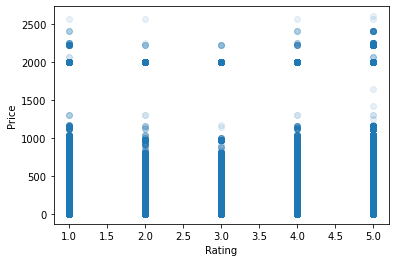

In [22]:
import matplotlib.pyplot as plt
ylabel = data_df["Price"]
plt.ylabel("Price")
plt.xlabel("Rating")
xlabel = data_df["Rating"]
plt.scatter(xlabel, ylabel, alpha=0.1)
plt.show()

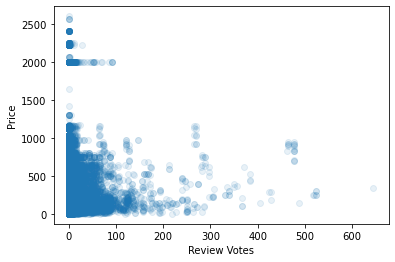

In [23]:
ylabel2 = data_df["Price"]
plt.ylabel("Price")
xlabel2 = data_df["Review Votes"]
plt.xlabel("Review Votes")
plt.scatter(xlabel2, ylabel2, alpha=0.1)
plt.show()

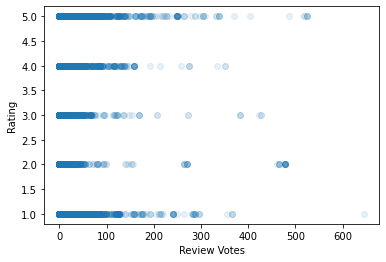

In [24]:
ylabel3 = data_df["Rating"]
plt.ylabel("Rating")
xlabel3 = data_df["Review Votes"]
plt.xlabel("Review Votes")
plt.scatter(xlabel3, ylabel3, alpha=0.1)
plt.show()

In [25]:
corr_matrix = data_df.corr()
corr_matrix["Rating"].sort_values(ascending = False)

Rating          1.000000
Price           0.073948
Review Votes   -0.046526
Name: Rating, dtype: float64

In [26]:
corr_matrix = data_df.corr()
corr_matrix["Price"].sort_values(ascending = False)

Price           1.000000
Rating          0.073948
Review Votes    0.022164
Name: Price, dtype: float64

In [27]:
all_reviews = data_df["Reviews"]
all_reviews.head()

308654    Yes, it meet my expectation and the phone is w...
395750    Amazing phone. It's lasted me a while now. Sti...
43272     Excellent I Really Needed This Upgrade And Eve...
164378                          Great cellphone for a few $
310743                                    Great she love it
Name: Reviews, dtype: object

In [28]:
data_df = data_df.reset_index(drop=True)

In [29]:
data_df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"Samsung Galaxy Exhibit 4G (T-Mobile), t679",Samsung,119.99,4,"Yes, it meet my expectation and the phone is w...",0.0
1,"Sony Xperia Z3 D6653 GSM Cellphone Unlocked, I...",Sony,279.95,5,Amazing phone. It's lasted me a while now. Sti...,0.0
2,Apple iPhone 5s 32GB (Gold) - AT&T,Apple,54.34,5,Excellent I Really Needed This Upgrade And Eve...,0.0
3,"BLU WIN JR - 4.0"" Windows Smartphone - Global ...",BLU,59.99,5,Great cellphone for a few $,0.0
4,Samsung Galaxy Grand Prime Dual Sim Factory Un...,Samsung,194.90,4,Great she love it,0.0


In [30]:
all_reviews = data_df['Reviews']
all_sent_values = []
all_sentiments = []

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

In [33]:
sample = data_df['Reviews'][1231]
print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

Great phone .
Sentiment: 
0.6


In [34]:
sample1 = data_df['Reviews'][99314]
print(sample1)
print('Sentiment: ')
print(sentiment_value(sample1))

The phone seems great, can't get pics and camera colors to come out right. Looks neg. Sent for a new one.
Sentiment: 
0.6


In [35]:
sample2 = data_df['Reviews'][9001]
print(sample2)
print('Sentiment: ')
print(sentiment_value(sample2))

It is not compatible with Straight Talk, Don't waste your money I can't receive picture messages group messages, although everything else does work. Fml, it came with a cheap headphones and a international charger not a is one.
Sentiment: 
0.2


In [36]:
sample3 = data_df['Reviews'][7036]
print(sample3)
print('Sentiment: ')
print(sentiment_value(sample3))

The phone doesn't work. The screen flickers and the battery smells like it's burnt in the first week.The power died during the video play several times and the burnt smell got worse.FGS won't exchange or refund. They never once mention about the defective condition of the item I described nor EVEN TESTED OR HAVE A LOOK AT IT. They probably knew it at the time they sell it to innocent customers.They don't even have the phone number nor intend to give that information.They are unresponsive to your emails, they simply ignore them except for auto reply emails.This seller is seriously a con man who sells defective items to customers and never has a willing to resolve the issue.They seem to sell defective items and take profits as you carefully look at the customer reviews.I shouldn't have bought from here. I deeply regret right now.Anyone help me?
Sentiment: 
-0.5


In [37]:
for i in range(0,20000):
    all_sent_values.append(sentiment_value(all_reviews[i])) # 8 minutes for calculation 

In [38]:
len(all_sent_values)

20000

In [40]:
#Sentiment Analysis on first 20,000 rows
temp_data = data_df[0:20000]

In [41]:
temp_data.shape

(20000, 6)

In [42]:
SENTIMENT_VALUE = []
SENTIMENT = []
for i in range(0,20000):
    sent = all_sent_values[i]
    if (sent<=1 and sent>=0.5):
        SENTIMENT.append('V.Positive')
        SENTIMENT_VALUE.append(5)
    elif (sent<0.5 and sent>0):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(4)
    elif (sent==0):
        SENTIMENT.append('Neutral')
        SENTIMENT_VALUE.append(3)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(2)
    else:
        SENTIMENT.append('V.Negative')
        SENTIMENT_VALUE.append(1)

In [43]:
temp_data['SENTIMENT_VALUE'] = SENTIMENT_VALUE
temp_data['SENTIMENT'] = SENTIMENT

C:\Users\Admin\AppData\Local\Temp/ipykernel_3016/1264162791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['SENTIMENT_VALUE'] = SENTIMENT_VALUE
C:\Users\Admin\AppData\Local\Temp/ipykernel_3016/1264162791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['SENTIMENT'] = SENTIMENT


In [44]:
temp_data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,SENTIMENT_VALUE,SENTIMENT
0,"Samsung Galaxy Exhibit 4G (T-Mobile), t679",Samsung,119.99,4,"Yes, it meet my expectation and the phone is w...",0.0,5,V.Positive
1,"Sony Xperia Z3 D6653 GSM Cellphone Unlocked, I...",Sony,279.95,5,Amazing phone. It's lasted me a while now. Sti...,0.0,5,V.Positive
2,Apple iPhone 5s 32GB (Gold) - AT&T,Apple,54.34,5,Excellent I Really Needed This Upgrade And Eve...,0.0,5,V.Positive
3,"BLU WIN JR - 4.0"" Windows Smartphone - Global ...",BLU,59.99,5,Great cellphone for a few $,0.0,5,V.Positive
4,Samsung Galaxy Grand Prime Dual Sim Factory Un...,Samsung,194.90,4,Great she love it,0.0,5,V.Positive


In [45]:
#find accuracy
counter = 0
for i in range(0,20000):
    if (abs(temp_data['Rating'][i]-temp_data['SENTIMENT_VALUE'][i])>1):
        counter += 1
    

In [46]:
counter

4539

In [47]:
accuracy = (temp_data.shape[0]-counter)/temp_data.shape[0]

In [48]:
percent_accuracy = accuracy*100

In [49]:
percent_accuracy

77.305

In [50]:
temp_data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,SENTIMENT_VALUE,SENTIMENT
0,"Samsung Galaxy Exhibit 4G (T-Mobile), t679",Samsung,119.99,4,"Yes, it meet my expectation and the phone is w...",0.0,5,V.Positive
1,"Sony Xperia Z3 D6653 GSM Cellphone Unlocked, I...",Sony,279.95,5,Amazing phone. It's lasted me a while now. Sti...,0.0,5,V.Positive
2,Apple iPhone 5s 32GB (Gold) - AT&T,Apple,54.34,5,Excellent I Really Needed This Upgrade And Eve...,0.0,5,V.Positive
3,"BLU WIN JR - 4.0"" Windows Smartphone - Global ...",BLU,59.99,5,Great cellphone for a few $,0.0,5,V.Positive
4,Samsung Galaxy Grand Prime Dual Sim Factory Un...,Samsung,194.90,4,Great she love it,0.0,5,V.Positive


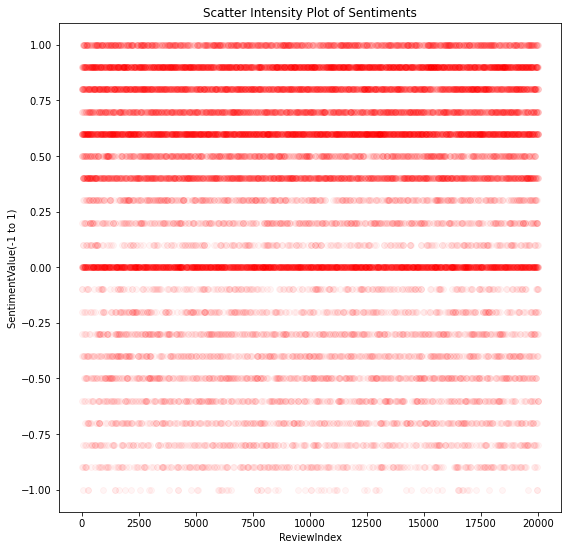

In [51]:
xaxis = []
for i in range(0,20000):
    xaxis.append(i)

ylabel_new_1 = all_sent_values[:20000]

xlabel = xaxis
plt.figure(figsize=(9,9))
plt.xlabel('ReviewIndex')
plt.ylabel('SentimentValue(-1 to 1)')
plt.plot(xlabel, ylabel_new_1, 'ro',  alpha=0.04)

plt.title('Scatter Intensity Plot of Sentiments')
plt.show()

In [52]:
product_name_20k = []
for item in temp_data["Product Name"]:
    if (item in product_name_20k):
        continue
    else:
        product_name_20k.append(item)

In [53]:
len(product_name_20k)

2250

In [54]:
brands_temp = []
for item in temp_data["Brand Name"]:
    if (item in brands_temp):
        continue
    else:
        brands_temp.append(item)

In [55]:
len(brands_temp)

210

In [56]:
testing2 = pd.pivot_table(temp_data,index=['Brand Name'],values=['Rating', 'Review Votes','SENTIMENT_VALUE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing2 = testing2.sort_values(by=('sum', 'Rating'), ascending = False)
testing2.head(10)

sum                                   mean               \
           Rating Review Votes SENTIMENT_VALUE    Rating Review Votes   
Brand Name                                                              
Samsung     14854         6066           15156  3.948432     1.612440   
BLU         13588         3331           14050  3.830843     0.939103   
Apple       13520         6026           13779  3.946293     1.758903   
LG           4660         1142            4879  3.807190     0.933007   
Nokia        3810         1524            3997  3.840726     1.536290   
BlackBerry   3607         1327            3530  3.665650     1.348577   
Motorola     3164         1586            3288  3.858537     1.934146   
HTC          2442         1076            2704  3.488571     1.537143   
CNPGD        2325          976            2758  3.095872     1.299601   
OtterBox     2092          114            2037  4.295688     0.234086   

                            
           SENTIMENT_VALUE  
Brand Name                  
Samsung           4.028708  
BLU               3.961094  
Apple             4.021891  
LG                3.986111  
Nokia             4.029234  
BlackBerry        3.587398  
Motorola          4.009756  
HTC               3.862857  
CNPGD             3.672437  
OtterBox          4.182752

In [57]:
testing3 = pd.pivot_table(temp_data,index=['Product Name'],values=['Rating', 'Review Votes','SENTIMENT_VALUE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing3 = testing3.sort_values(by=('sum', 'Rating'), ascending = False)
testing3.head(10)

sum               \
                                                   Rating Review Votes   
Product Name                                                             
Motorola Moto E (1st Generation) - Black - 4 GB...    326           40   
BLU Dash JR 4.0K Android 4.2, 2MP - Unlocked (S...    293           17   
OtterBox Iphone 5/5S/SE Defender Case w/ Drop a...    283           11   
Motorola Moto E (1st Generation) - Black - 4 GB...    279           21   
Samsung Galaxy S Duos GT-S7562 GSM Unlocked Tou...    278           25   
BLU Energy X Plus Smartphone - With 4000 mAh Su...    275           68   
Samsung Galaxy Grand Prime Dual Sim Factory Unl...    272           50   
BLU Dash JR 4.0 K Smartphone - Unlocked - White       266           22   
Samsung Galaxy S7 Edge G9350 32GB HK DUAL SIM F...    262           58   
Apple iPhone 5s 32GB (Silver) - AT&T                  257           41   

                                                                        mean  \
                                                   SENTIMENT_VALUE    Rating   
Product Name                                                                   
Motorola Moto E (1st Generation) - Black - 4 GB...             297  4.591549   
BLU Dash JR 4.0K Android 4.2, 2MP - Unlocked (S...             254  4.069444   
OtterBox Iphone 5/5S/SE Defender Case w/ Drop a...             304  3.985915   
Motorola Moto E (1st Generation) - Black - 4 GB...             268  4.573770   
Samsung Galaxy S Duos GT-S7562 GSM Unlocked Tou...             273  3.808219   
BLU Energy X Plus Smartphone - With 4000 mAh Su...             281  4.104478   
Samsung Galaxy Grand Prime Dual Sim Factory Unl...             274  4.184615   
BLU Dash JR 4.0 K Smartphone - Unlocked - White                241  4.030303   
Samsung Galaxy S7 Edge G9350 32GB HK DUAL SIM F...             274  3.969697   
Apple iPhone 5s 32GB (Silver) - AT&T                           255  4.213115   

                                                                 \
                                                   Review Votes   
Product Name                                                      
Motorola Moto E (1st Generation) - Black - 4 GB...     0.563380   
BLU Dash JR 4.0K Android 4.2, 2MP - Unlocked (S...     0.236111   
OtterBox Iphone 5/5S/SE Defender Case w/ Drop a...     0.154930   
Motorola Moto E (1st Generation) - Black - 4 GB...     0.344262   
Samsung Galaxy S Duos GT-S7562 GSM Unlocked Tou...     0.342466   
BLU Energy X Plus Smartphone - With 4000 mAh Su...     1.014925   
Samsung Galaxy Grand Prime Dual Sim Factory Unl...     0.769231   
BLU Dash JR 4.0 K Smartphone - Unlocked - White        0.333333   
Samsung Galaxy S7 Edge G9350 32GB HK DUAL SIM F...     0.878788   
Apple iPhone 5s 32GB (Silver) - AT&T                   0.672131   

                                                                    
                                                   SENTIMENT_VALUE  
Product Name                                                        
Motorola Moto E (1st Generation) - Black - 4 GB...        4.183099  
BLU Dash JR 4.0K Android 4.2, 2MP - Unlocked (S...        3.527778  
OtterBox Iphone 5/5S/SE Defender Case w/ Drop a...        4.281690  
Motorola Moto E (1st Generation) - Black - 4 GB...        4.393443  
Samsung Galaxy S Duos GT-S7562 GSM Unlocked Tou...        3.739726  
BLU Energy X Plus Smartphone - With 4000 mAh Su...        4.194030  
Samsung Galaxy Grand Prime Dual Sim Factory Unl...        4.215385  
BLU Dash JR 4.0 K Smartphone - Unlocked - White           3.651515  
Samsung Galaxy S7 Edge G9350 32GB HK DUAL SIM F...        4.151515  
Apple iPhone 5s 32GB (Silver) - AT&T                      4.180328

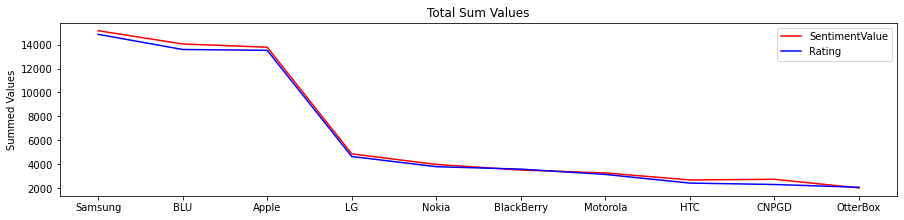

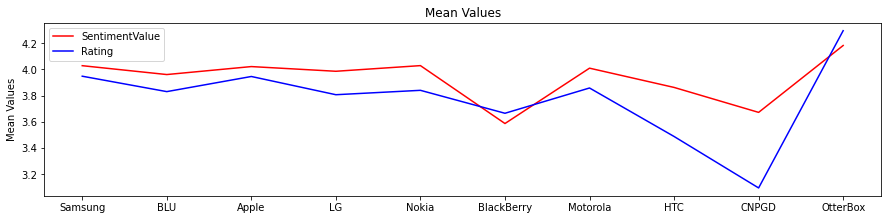

In [58]:
import pylab

names = testing2.index[:10]
y = testing2['sum', 'SENTIMENT_VALUE'][:10]
y2 = testing2['sum', 'Rating'][:10]



pylab.figure(figsize=(15,7))
x = range(10)
pylab.subplot(2,1,1)
pylab.xticks(x, names)
pylab.ylabel('Summed Values')
pylab.title('Total Sum Values')
pylab.plot(x,y,"r-",x,y2,'b-')
pylab.legend(['SentimentValue', 'Rating'])

y_new = testing2['mean', 'SENTIMENT_VALUE'][:10]
y2_new = testing2['mean', 'Rating'][:10]



pylab.figure(figsize=(15,7))


pylab.subplot(2,1,2)
pylab.xticks(x, names)
pylab.ylabel('Mean Values')
pylab.title('Mean Values')
pylab.plot(x,y_new,"r-",x,y2_new,'b-')
pylab.legend(['SentimentValue', 'Rating'])


pylab.show()

In [59]:
samsung = []
blu = []
apple = []
lg = []
nokia = []



for i in range(0,20000):
    score = all_sent_values[i]
    brand = temp_data['Brand Name'][i]
    if (brand == 'Samsung'):
        samsung.append(score)
    elif (brand == 'BLU'):
        blu.append(score)
    elif (brand == 'Apple'):
        apple.append(score)
    elif (brand == 'LG'):
        lg.append(score)
    elif (brand == 'Nokia'):
        nokia.append(score)
    else:
        continue

In [60]:
list_of_brands = [samsung, blu, apple,lg,nokia]
name_of_brands = ['Samsung', 'BLU', 'Apple', 'LG', 'Nokia']

In [61]:
def plot_brand(brand, name):
    pylab.figure(figsize=(20,3))
    x = range(0,800)
    
    #pylab.xticks(x)
    pylab.ylabel('Sentiment')
    pylab.title(name)
    #pylab.plot(x,brand,"ro", alpha = 0.2)
    pylab.plot(x, brand[:800], color='#4A148C', linestyle='none', marker='o',ms=9, alpha = 0.4)
    
    pylab.show()

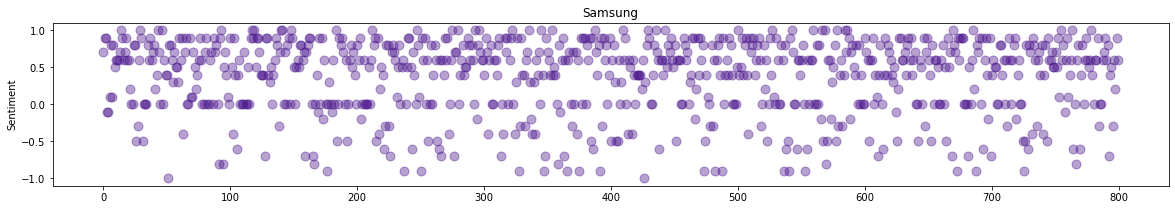

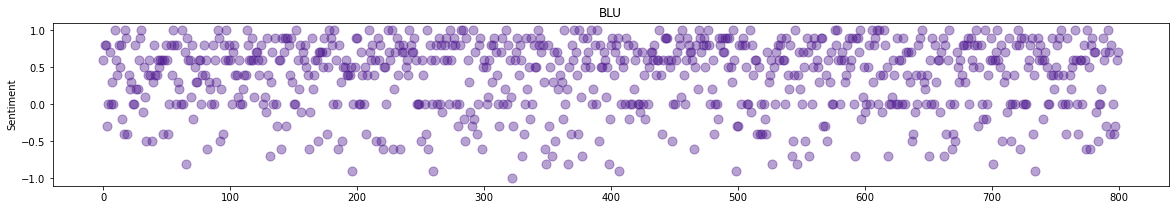

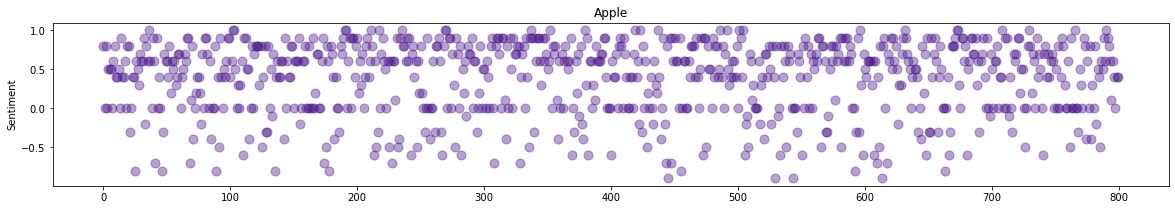

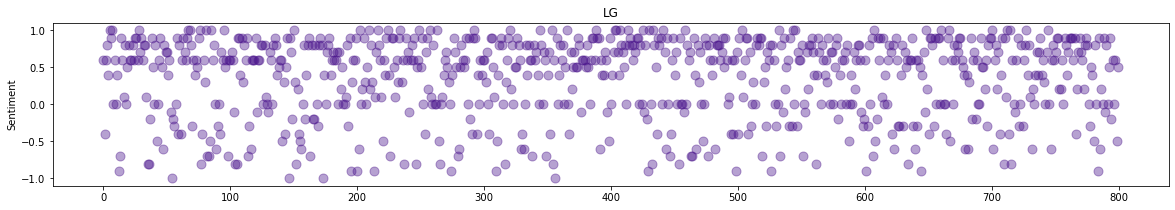

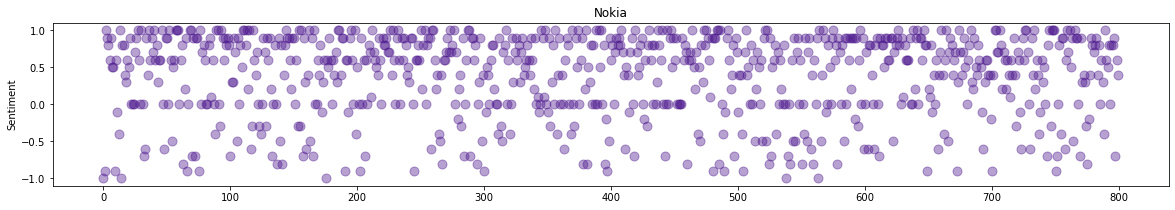

In [62]:
for i in range(0,len(list_of_brands)):
    plot_brand(list_of_brands[i],name_of_brands[i])